<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/Top_Oasis_Tracks_EDA_%26_Sentiment_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Overview**  
This project explores the **sentiment magnitude** of the most popular Oasis songs of all time.  

---

## **Methodology**  
1. **Data Collection:** Sourced popular Oasis songs from the [official lyrics repository](https://oasisinet.com/lyrics/) based on the author's knowledge and expertise as a dedicated Oasis fan.  
2. **Dataset Creation:** Compiled a dataset with **song titles** and **lyrics** as headers.  
3. **Text Pre-processing:** Applied normalization techniques, including **stopword removal**, **lowercasing**, and **punctuation removal**.  
4. **Exploratory Data Analysis (EDA):** Conducted initial analysis to uncover patterns in the data.  
5. **Sentiment Clustering:** Employed a **supervised approach** to classify lyrics into **three main clusters** based on labels (e.g., sentiment-oriented adjectives and nouns).  
6. **Data Visualization:** Created visualizations to highlight patterns and trends.  
7. **Sentiment Analysis:** Analyzed lyrics sentiment using the **`nltk VADER lexicon`**, a **rule-based approach** that does not rely on pre-labeled training data, to label each lyric as **positive**, **neutral**, or **negative**.  


### **Disclaimer**  
This notebook may reflect **confirmation** and **availability biases** from the author.  
While song lyrics were sourced from the official Oasis website, the selection of the **most popular songs** is subjective, based on the author's memory and personal opinion.  

---

## **Process**  
1. **Data Cleaning and Wrangling**  
2. **Exploratory Data Analysis (EDA)**  
   - What are the **longest** and **shortest** lyrics in the top Oasis songs?  
   - How many times does Liam sing the word **"shine"** in the lyrics?  
   - What are the **main themes** in Oasis lyrics?  
   - Which tracks have the **most mentions** of specific themes?  

3. **Sentiment Analysis with NLTK VADER Lexicon**  
4. **Data Visualization**  

---

### **References**  
- Lyrics sourced from: [Oasis Official Website](https://oasisinet.com/lyrics/)  

In [ ]:
!pip install -q transformers
!pip install datasets transformers huggingface_hub
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

#Data Cleaning & Wrangling

1. Importing the dataset
2. Renaming headers

In [6]:
#@title Import the Dataset
df = pd.read_excel('/content/Oasis.xlsx')
print(df.shape)
df.head()

(90, 2)


,track_name,lyrics
0,(Get Off Your) High Horse Lady,Get off your high horse lady\nI don’t need a r...
1,(It's Good) To Be Free,Head like a rock spinning round and round\nI f...
2,(Probably) All In The Mind,Show me who you are\nI’ll show you what you lo...
3,A Bell Will Ring,"A little space, a little time\nsee what it can..."
4,Acquiesce,I don’t know what it is that makes me feel ali...


#Text Pre-Processing - Normalization

Transforming text into a standard, consistent format to improve the performance of natural language processing (NLP) tasks.  

### **Key Steps in Normalization:**
1. **Lowercasing** - Converts all text to lowercase (e.g., "HELLO" → "hello") to avoid case sensitivity issues.  
2. **Removing Punctuation** - Eliminates symbols like commas, periods, and special characters to focus on words.  
3. **Removing Stopwords** - Filters out common words (e.g., "and," "the," "is") that do not add significant meaning.  
4. **Removing Numbers** - Deletes numerical values if they are irrelevant to the context.  
5. **Lemmatization/Stemming** - Reduces words to their root form (e.g., "running" → "run") for consistency.

N.b -  **Lemmatization/Stemming** - this practise didn't apply due to potentially interfere with the subsequent cluster labeling where real-life words were needed to match up the prime sentiment.


In [7]:
#lowercase all lyrics
df['clean_lyric'] = df['lyrics'].str.lower()
print(df.clean_lyric)

0     get off your high horse lady\ni don’t need a r...
1     head like a rock spinning round and round\ni f...
2     show me who you are\ni’ll show you what you lo...
3     a little space, a little time\nsee what it can...
4     i don’t know what it is that makes me feel ali...
                            ...                        
85    i’m free to be whatever i\nwhatever i choose a...
86    you know that feeling you get\nyou feel you’re...
87    found what i’ve lost inside\nmy spirit has bee...
88    today is gonna be the day\nthat they’re gonna ...
89    you’re never gonna get along, hanging out, thi...
Name: clean_lyric, Length: 90, dtype: object


In [8]:
# remove punctuation from lyrics
df['clean_lyric'] = df['clean_lyric'].str.replace('[^\w\s]','')
#replace \n with a space
df['clean_lyric'] = df['clean_lyric'].str.replace('\n', ' ', regex=False)
print(df.clean_lyric)

0     get off your high horse lady i don’t need a ri...
1     head like a rock spinning round and round i fo...
2     show me who you are i’ll show you what you lov...
3     a little space, a little time see what it can ...
4     i don’t know what it is that makes me feel ali...
                            ...                        
85    i’m free to be whatever i whatever i choose an...
86    you know that feeling you get you feel you’re ...
87    found what i’ve lost inside my spirit has been...
88    today is gonna be the day that they’re gonna t...
89    you’re never gonna get along, hanging out, thi...
Name: clean_lyric, Length: 90, dtype: object


In [9]:
#remove numbers

import re

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['clean_lyric'] = df['clean_lyric'].apply(remove_numbers)

In [10]:
#drop lyrics column and rename for readability
df.drop('lyrics', axis=1, inplace=True)
df.rename(columns={'clean_lyric': 'lyrics',
                   'track_name': 'song'}, inplace=True)
df.head()

,song,lyrics
0,(Get Off Your) High Horse Lady,get off your high horse lady i don’t need a ri...
1,(It's Good) To Be Free,head like a rock spinning round and round i fo...
2,(Probably) All In The Mind,show me who you are i’ll show you what you lov...
3,A Bell Will Ring,"a little space, a little time see what it can ..."
4,Acquiesce,i don’t know what it is that makes me feel ali...


In [11]:
#@title Remove English stopwords
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from 'lyrics' column
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Optional: View the updated DataFrame
print(df['lyrics'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0     get high horse lady don’t need ride tonight ge...
1     head like rock spinning round round found hole...
2     show i’ll show love i’ll give half world that’...
3     little space, little time see little faith, pe...
4     don’t know makes feel alive don’t know wake th...
                            ...                        
85    i’m free whatever whatever choose i’ll sing bl...
86    know feeling get feel you’re older time ain’t ...
87    found i’ve lost inside spirit purified take th...
88    today gonna day they’re gonna throw back shoul...
89    you’re never gonna get along, hanging out, thi...
Name: lyrics, Length: 90, dtype: object


## Exploratory Data Analysis (EDA)

1. What are the longest lyrics of the top Oasis songs?
2. What are the shortest lyrics of the top Oasis songs?
3. What is the Oasis song with the longest lyrics?
4. How long are Oasis lyrics on average?
5. What tracks have the most mentions?
6. How many times does Liam sings "shine" in the lyrics?

In [12]:
#@title Calculate the length of each lyrics
df['lyrics_length'] = df['lyrics'].str.len()
df[['song','lyrics_length']].sort_values(by='lyrics_length', ascending=False)

,song,lyrics_length
63,Slide Away,1420
52,My Big Mouth,1090
33,Hey Now,1007
13,Champagne Supernova,1004
73,The Girl in the Dirty Shirt,995
...,...,...
3,A Bell Will Ring,361
81,Turn Up The Sun,312
57,Roll It Over,300
0,(Get Off Your) High Horse Lady,261


In [13]:
#@title What is the Oasis song with the longest lyrics?
fig = px.bar(
    df.sort_values(by='lyrics_length', ascending=False),
    x='song',
    y='lyrics_length',
    title='What is the Oasis song with the longest lyrics?',
    labels={'song': 'Song', 'lyrics_length': 'Length'},
    color='lyrics_length',  # Color based on mentions
    hover_name='song'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()

In [14]:
#@title Top 3 Oasis songs with the longest lyrics
df[['song','lyrics_length']].sort_values(by='lyrics_length', ascending=False).head(3)

,song,lyrics_length
63,Slide Away,1420
52,My Big Mouth,1090
33,Hey Now,1007


In [15]:
#@title Top 3 Oasis songs with the shortest lyrics
df[['song','lyrics_length']].sort_values(by='lyrics_length', ascending=False).tail(3)

,song,lyrics_length
57,Roll It Over,300
0,(Get Off Your) High Horse Lady,261
64,Soldier On,146


In [16]:
#@title What do you mean by Lengthy Lyrics?
fig = px.histogram(df, x='lyrics_length', nbins=100)
fig.show()
print(f'Lyrics length varies but most songs seem to be :\n' + str(df.lyrics_length.mode()))

Lyrics length varies but most songs seem to be :
0    521
1    693
2    880
Name: lyrics_length, dtype: int64


In [17]:
#@title How long are Oasis songs on average?
#the mean of lyrics_length
df['lyrics_length'].mean()
print(f'Oasis songs have {df["lyrics_length"].mean().round(0)} words on average')

Oasis songs have 636.0 words on average


## How many times does Liam sings "shine" in the lyrics?

In [18]:
df['shine'] = df['lyrics'].str.contains(r'\bshine\b', case=False, regex=True)

# Count the total occurrences of the word 'shine'
shine_count = df['lyrics'].str.count(r'(?i)\bshine\b').sum()
percentage = (shine_count / len(df)) * 100

print(f"Liam sings 'shine' {shine_count} times out of a total of {len(df)} songs.")
print(f"This makes up {percentage:.2f}% of the songs.")

Liam sings 'shine' 23 times out of a total of 90 songs.
This makes up 25.56% of the songs.


## Oasis lyrics main theme by mentions

In this part of the analysis, we're looking to cluster relevant words from the lyrics into macro themes.

As a proper Oasis fan myself, I’ve identified three main buckets of themes showing up in their most famous tunes.

As a sidenote, do note that the following classification is the result of a supervised and manual approach groomed by the exposure of the author to the band - **be warned, inaccuracies and biases may apply!**

In [19]:
import pandas as pd

# Define word categories
love_relationships = ['love', 'heart', 'kiss', 'lover', 'passion', 'angel',
                     'dawn', 'relationship', 'together', 'darling', 'baby', 'with me', 'friend', 'brother', 'mate', 'sister', 'bond',
                          'together', 'each other','shake', 'forever']

rebellion_individualism = ['work', 'job', 'chain', 'money', 'shoe', 'beg','sun','shine',
                          'struggle', 'poverty', 'earn', 'grind','light','rebel', 'freedom', 'revolution', 'resist', 'cigarette', 'alcohol',
                           'rule', 'outlaw', 'independent', 'wild', 'break', 'war','chase', 'strength', 'fight','today','rock','tonight']

nostalgia_escapism = ['dream', 'cloud','dawn', 'imagine', 'sunset', 'wonder', 'pray',
                     'free', 'heaven', 'sky', 'hope','hell', 'sad', 'cry', 'tears', 'pain', 'broken', 'lonely','rain','blind','fade',
                         'survive',  'loss', 'shadow', 'maybe', 'alone', 'yesterday', 'morning', 'someday','young']


# Count occurrences of each category using regex for exact word matching
df['love_relationships'] = df['lyrics'].str.count(r'(?i)\b(' + '|'.join(love_relationships) + r')\b')
df['rebellion_individualism'] = df['lyrics'].str.count(r'(?i)\b(' + '|'.join(rebellion_individualism) + r')\b')
df['nostalgia_escapism'] = df['lyrics'].str.count(r'(?i)\b(' + '|'.join(nostalgia_escapism) + r')\b')

# Print counts for each category
print(df[['love_relationships', 'rebellion_individualism', 'nostalgia_escapism']].sum())

love_relationships         178
rebellion_individualism    184
nostalgia_escapism         278
dtype: int64


# What tracks have the most mentions ?

In [20]:
# Sort the table by each category to find the songs with the most mentions
category_cols = ['nostalgia_escapism', 'love_relationships', 'rebellion_individualism']

# Store results for each category
top_songs = {}

# Loop through each category and sort values
for category in category_cols:
    # Sort values in descending order for each category
    sorted_df = df[['song', category]].sort_values(by=category, ascending=False)

    # Get the top song for the category
    top_song = sorted_df.iloc[0]  # Top row after sorting
    top_songs[category] = {
        'song': top_song['song'],
        'count': top_song[category]
    }

# Display results
for category, info in top_songs.items():
    print(f"Top song for {category.replace('_', ' ').title()}:")
    print(f"Song: {info['song']}, Mentions: {info['count']}\n")

Top song for Nostalgia Escapism:
Song: Live Forever, Mentions: 22

Top song for Love Relationships:
Song: She Is Love, Mentions: 15

Top song for Rebellion Individualism:
Song: Rock 'n' Roll Star, Mentions: 15



##Data Visualization
Moving Each Songs into the Sentiment bucket means creating subsets of data with themed mentions.


In [21]:
# Filter rows where 'rebellion_individualism' is greater than 0
rebel = df[df['rebellion_individualism'] > 0][['song', 'lyrics', 'rebellion_individualism']]
nostalgia = df[df['nostalgia_escapism'] > 0][['song', 'lyrics', 'nostalgia_escapism']]
love = df[df['love_relationships'] > 0][['song', 'lyrics', 'love_relationships']]

In [22]:
#@title Songs with Most Love/Relationships Mentions
import plotly.express as px

# Create bar chart
fig = px.bar(
    love.sort_values(by='love_relationships', ascending=False),
    x='song',
    y='love_relationships',
    title='What lyrics have the most mentions in the Love/Relationships cluster?',
    labels={'song': 'Song', 'love_relationships': 'Mentions'},
    color='love_relationships',  # Color based on mentions
    hover_name='song'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()

In [23]:
#@title Songs with Most Nostalgia/Escapism Mentions

fig = px.bar(
    nostalgia.sort_values(by='nostalgia_escapism', ascending=False),
    x='song',
    y='nostalgia_escapism',
    title='What lyrics have the most mentions in the Nostalgia/Escapism cluster?',
    labels={'song': 'Song', 'nostalgia_escapism': 'Mentions'},
    color='nostalgia_escapism',  # Color based on mentions
    hover_name='song'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()


In [24]:
#@title Songs with Most Rebellion/Individualism Mentions
fig = px.bar(
    rebel.sort_values(by='rebellion_individualism', ascending=False),
    x='song',
    y='rebellion_individualism',
    title='What lyrics have the most mentions in the Rebellion/Individualism cluster?',
    labels={'song': 'Song', 'rebellion_individualism': 'Mentions'},
    color='rebellion_individualism',  # Color based on mentions
    hover_name='song'
)

# Rotate x-axis labels
fig.update_layout(
    xaxis_tickangle=-45  # Rotate labels 45 degrees counterclockwise
)

# Show plot
fig.show()


## Mapping out Sentiment Direction of Lyrics using `nltk vader_lexicon`

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) is specifically designed for sentiment analysis and is lexicon-based, which typically falls under **unsupervised learning** methods.

- No labeled data is used: The code does not rely on pre-labeled training data (e.g., text samples with predefined sentiment labels).
- Rule-based approach: It leverages the VADER lexicon (a pre-built sentiment lexicon) to determine sentiment scores directly from the text using predefined rules, not a trained model.





In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
def analyze_sentiment(lyrics):
    sentiment = sia.polarity_scores(lyrics)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis on the lyrics
df['sentiment'] = df['lyrics'].apply(analyze_sentiment)

# Save results to a new CSV file
df.to_excel('lyrics_with_sentiment.xlsx', index=False)
df[['song', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,song,sentiment
0,(Get Off Your) High Horse Lady,negative
1,(It's Good) To Be Free,positive
2,(Probably) All In The Mind,positive
3,A Bell Will Ring,positive
4,Acquiesce,positive
...,...,...
85,Whatever,positive
86,Where Did It All Go Wrong?,positive
87,Who Feels Love?,positive
88,Wonderwall,positive


In [27]:
#@title Distribution of Oasis Song Sentiment
sentiment_counts = df.groupby('sentiment').size().reset_index(name='count')

# Create the bar chart
fig = px.bar(sentiment_counts,
             x='count',
             y='sentiment',
             orientation='h',
             color='sentiment',
             color_continuous_scale='Dark2')

# Update layout to remove top and right spines
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    title_x=0.5
)

# Show plot
fig.show()

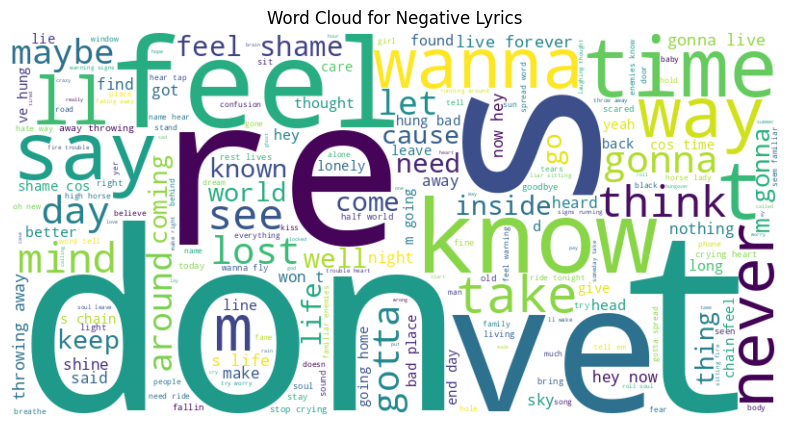

In [28]:
#@title Word Cloud Sample for Negative Lyrics
from wordcloud import WordCloud

positive_lyrics = " ".join(df[df['sentiment'] == 'negative']['lyrics'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_lyrics)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Lyrics')
plt.show()